<a href="https://colab.research.google.com/github/adityamishra5050/CIFAR-10-Neural-Network/blob/main/DL_ASS_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1 :)**

In [ ]:
import os                                 #importing pytorch , numpy and matplotlib libraries for different task
import numpy as np                        # but the given task are implemented from scratch as directed in the Asssignment 1
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import torch.utils.data as data
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from torchvision.utils import make_grid

In [ ]:
transform_tensor = transforms.ToTensor() #Tensors are defined by their transformation properties under coordinate change

In [ ]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

given_train_data=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
given_test_data=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# length of trainig data
len(given_train_data)

50000

In [ ]:
# length of testing data
len(given_test_data)

10000

In [ ]:
# finding the label of classes
classes = given_train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
torch.manual_seed(43)
preffered_val_size = 1000
train_size = len(given_train_data) - preffered_val_size

In [ ]:
# splitting the training data into training and validation set
train_ds, val_ds = random_split(given_train_data, [train_size, preffered_val_size])
# finding the length of training and validation set
len(train_ds), len(val_ds)

(49000, 1000)

In [ ]:
# defining the batch size of the data
data_batch_size=4000

In [ ]:
# loading the training data for further processing
data_train_loader = DataLoader(train_ds, data_batch_size, shuffle=True, num_workers=4, pin_memory=True)
# loading the validation data for further processing
data_val_loader = DataLoader(val_ds, data_batch_size*2, num_workers=4, pin_memory=True)
# loading the testing data for further processing
data_test_loader = DataLoader(given_test_data, data_batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


images.shape: torch.Size([4000, 3, 32, 32])


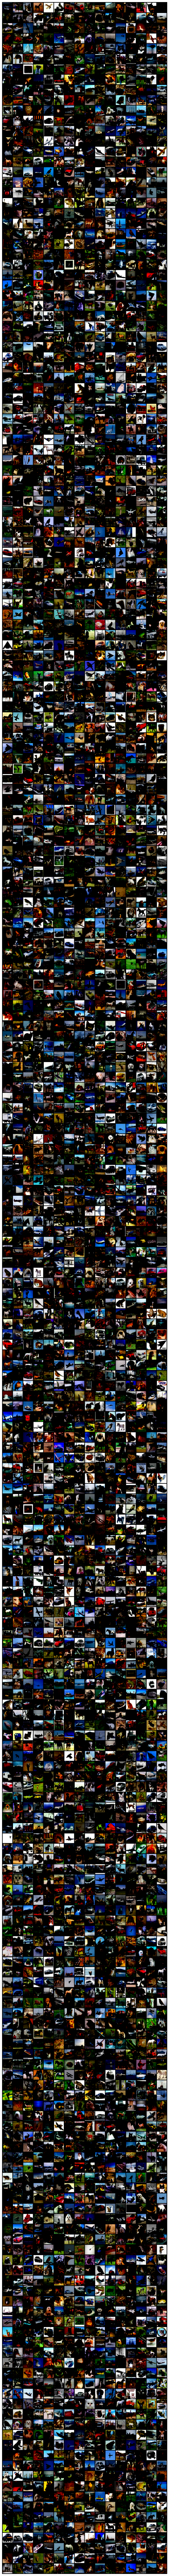

In [ ]:
# for having a view for the given data
for images, _ in (data_train_loader):
    print('images.shape:', images.shape)
    plt.figure(figsize=(120,160))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [ ]:
# for finding out the accuracy of the model
def model_accuracy(outputs, data_labels):
    _, got_preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(got_preds == data_labels).item() / len(got_preds))

In [ ]:
class GurmukhiClassification1(nn.Module):
    def model_training(self, batch):
        images, data_labels = batch
        out = self(images)                  # Generate predictions
        model_loss = F.cross_entropy(out, data_labels) # Calculate model_loss
        l1regu = 0
        for param in model.parameters() :
          l1regu +=param.pow(2.0).sum()
          lr_rate=0.0001
        model_loss +=lr_rate*l1regu
        return model_loss

    def model_validation(self, batch):
        images, data_labels = batch
        out = self(images)                    # Generate predictions
        model_loss = F.cross_entropy(out, data_labels)   # Calculate model_loss
        acc = model_accuracy(out, data_labels)           # Calculate accuracy
        return {'val_model_loss': model_loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_model_losses = [x['val_model_loss'] for x in outputs]
        epoch_model_loss = torch.stack(batch_model_losses).mean()   # Combine model_losses
        model_batch_accuracies = [x['val_acc'] for x in outputs]
        model_epoch_accuracy = torch.stack(model_batch_accuracies).mean()      # Combine accuracies
        return {'val_model_loss': epoch_model_loss.item(), 'val_acc': model_epoch_accuracy.item()}

    def epoch_end(self, epoch, model_result):
        print("Epoch [{}], val_model_loss: {:.4f}, val_acc: {:.4f}".format(epoch, model_result['val_model_loss'], model_result['val_acc']))

**Using Tanh Activation Function**

In [ ]:
class GRUNUMModel(GurmukhiClassification1):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 64)
        self.linear5 = nn.Linear(64, output_size)

    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.linear1(out)
        out = F.tanh(out)
        out = self.linear2(out)
        out = F.tanh(out)
        out = self.linear3(out)
        out = F.tanh(out)
        out = self.linear4(out)
        out = F.tanh(out)
        out = self.linear5(out)
        return out

In [ ]:
#defining a function for the model evaluation
def model_evaluation(model, data_val_loader):
    outputs = [model.model_validation(batch) for batch in data_val_loader]
    return model.validation_epoch_end(outputs)

#defining a function for fitting the model in my data
def model_insetion(epochs, lr, model, data_train_loader, data_val_loader, opt_func=torch.optim.SGD):
    model_performance = []
    model_optimizer = opt_func(model.parameters(), lr)
    for epoch in range(10):
        # This are the training steps
        for batch in data_train_loader:
            model_loss = model.model_training(batch)
            model_loss.backward()
            model_optimizer.step()
            model_optimizer.zero_grad()
        # This are the validation steps
        model_result = model_evaluation(model, data_val_loader)
        model.epoch_end(epoch, model_result)
        model_performance.append(model_result)
    return model_performance

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# defining a function for GPU processing
def pick_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [ ]:
device = pick_device()
device

device(type='cuda')

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# creating a class for loading the whole data for GPU processing
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
# defining the function for getting the graph of the model performance of model loss
def graph_of_model_losses(model_performance):
    model_losses = [x['val_model_loss'] for x in model_performance]
    plt.figure(figsize=(10,6))
    plt.plot(model_losses, '-o')
    plt.xlabel('epoch')
    plt.ylabel('model_loss')
    plt.title('model_loss vs. No. of epochs');

In [ ]:
# defining the function for getting the graph of the model performance of model accuracy
def graph_of_model_accuracies(ccuraciesmodel_performance):
    accuracies = [x['val_acc'] for x in model_performance]
    plt.figure(figsize=(10,6))
    plt.plot(accuracies, '-o')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
# loading the data_train to DeviceDataLoader
data_train_loader = DeviceDataLoader(data_train_loader, device)
# loading the data_val to DeviceDataLoader
data_val_loader = DeviceDataLoader(data_val_loader, device)
# loading the data_test to DeviceDataLoader
data_test_loader = DeviceDataLoader(data_test_loader, device)

In [ ]:
input_size = 3*32*32
output_size = 10

In [ ]:
# defining the model to the name 'model'
model = to_device(GRUNUMModel(), device)

In [ ]:
# finding out the model performance for forward pass
model_performance = [model_evaluation(model, data_val_loader)]
model_performance

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[{'val_model_loss': 2.305055618286133, 'val_acc': 0.10100000351667404}]

In [ ]:
model_performance += model_insetion(10,0.01, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 2.0046, val_acc: 0.2610
Epoch [1], val_model_loss: 1.9035, val_acc: 0.3070
Epoch [2], val_model_loss: 1.8624, val_acc: 0.3330
Epoch [3], val_model_loss: 1.8180, val_acc: 0.3500
Epoch [4], val_model_loss: 1.8113, val_acc: 0.3600
Epoch [5], val_model_loss: 1.8341, val_acc: 0.3490
Epoch [6], val_model_loss: 1.7939, val_acc: 0.3650
Epoch [7], val_model_loss: 1.7287, val_acc: 0.3980
Epoch [8], val_model_loss: 1.8251, val_acc: 0.3590
Epoch [9], val_model_loss: 1.9019, val_acc: 0.3150


In [ ]:
model_performance += model_insetion(20, 0.001 , model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 1.6296, val_acc: 0.4440
Epoch [1], val_model_loss: 1.6041, val_acc: 0.4490
Epoch [2], val_model_loss: 1.5892, val_acc: 0.4550
Epoch [3], val_model_loss: 1.5685, val_acc: 0.4700
Epoch [4], val_model_loss: 1.5654, val_acc: 0.4720
Epoch [5], val_model_loss: 1.5763, val_acc: 0.4690
Epoch [6], val_model_loss: 1.6032, val_acc: 0.4610
Epoch [7], val_model_loss: 1.5911, val_acc: 0.4580
Epoch [8], val_model_loss: 1.5889, val_acc: 0.4690
Epoch [9], val_model_loss: 1.6818, val_acc: 0.4550


In [ ]:
model_performance += model_insetion(10, 0.00001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 1.6140, val_acc: 0.4640
Epoch [1], val_model_loss: 1.5967, val_acc: 0.4610
Epoch [2], val_model_loss: 1.5946, val_acc: 0.4630
Epoch [3], val_model_loss: 1.5960, val_acc: 0.4620
Epoch [4], val_model_loss: 1.5965, val_acc: 0.4640
Epoch [5], val_model_loss: 1.5968, val_acc: 0.4620
Epoch [6], val_model_loss: 1.5967, val_acc: 0.4630
Epoch [7], val_model_loss: 1.5978, val_acc: 0.4620
Epoch [8], val_model_loss: 1.5987, val_acc: 0.4630
Epoch [9], val_model_loss: 1.5998, val_acc: 0.4630


In [ ]:
model_performance += model_insetion(10, 0.000001, model, data_train_loader, data_val_loader, torch.optim.Adam)###################################################

Epoch [0], val_model_loss: 1.5997, val_acc: 0.4630
Epoch [1], val_model_loss: 1.5998, val_acc: 0.4630
Epoch [2], val_model_loss: 1.5999, val_acc: 0.4630
Epoch [3], val_model_loss: 1.5999, val_acc: 0.4630
Epoch [4], val_model_loss: 1.6001, val_acc: 0.4620
Epoch [5], val_model_loss: 1.6001, val_acc: 0.4620
Epoch [6], val_model_loss: 1.6002, val_acc: 0.4620
Epoch [7], val_model_loss: 1.6003, val_acc: 0.4610
Epoch [8], val_model_loss: 1.6007, val_acc: 0.4620
Epoch [9], val_model_loss: 1.6007, val_acc: 0.4620


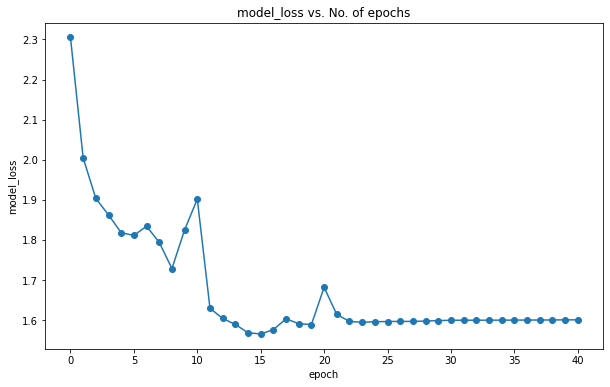

In [ ]:
graph_of_model_losses(model_performance)

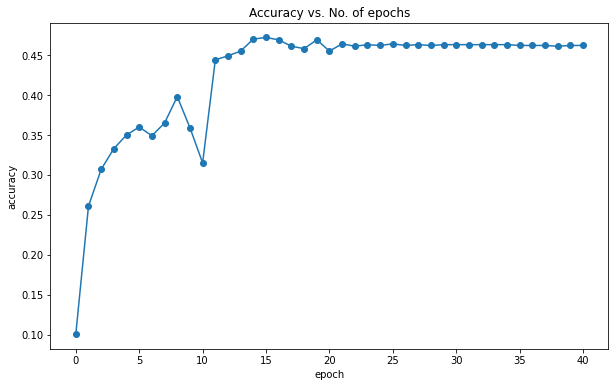

In [ ]:
graph_of_model_accuracies(model_performance)

In [ ]:
model_evaluation(model, data_test_loader)

{'val_model_loss': 1.5734996795654297, 'val_acc': 0.4768125116825104}

**Using Sigmoid Activation Function**

In [ ]:
class GRUNUMModel2(GurmukhiClassification1):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 64)
        self.linear5 = nn.Linear(64, output_size)

    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.linear1(out)
        out = F.sigmoid(out)
        out = self.linear2(out)
        out = F.sigmoid(out)
        out = self.linear3(out)
        out = F.sigmoid(out)
        out = self.linear4(out)
        out = F.sigmoid(out)
        out = self.linear5(out)
        return out

In [ ]:
# defining the model to the name 'model'
model = to_device(GRUNUMModel2(), device)

In [ ]:
# finding out the model performance for forward pass
model_performance = [model_evaluation(model, data_val_loader)]
model_performance

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[{'val_model_loss': 2.351163625717163, 'val_acc': 0.09399999678134918}]

In [ ]:
model_performance += model_insetion(10,0.01, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 2.3041, val_acc: 0.0930
Epoch [1], val_model_loss: 2.2246, val_acc: 0.1470
Epoch [2], val_model_loss: 2.0940, val_acc: 0.1900
Epoch [3], val_model_loss: 2.0856, val_acc: 0.1670
Epoch [4], val_model_loss: 2.0449, val_acc: 0.1780
Epoch [5], val_model_loss: 2.0374, val_acc: 0.2270
Epoch [6], val_model_loss: 1.9995, val_acc: 0.2590
Epoch [7], val_model_loss: 1.9590, val_acc: 0.2630
Epoch [8], val_model_loss: 1.8616, val_acc: 0.3400
Epoch [9], val_model_loss: 1.8232, val_acc: 0.3530


In [ ]:
model_performance += model_insetion(20, 0.001 , model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 1.7488, val_acc: 0.3720
Epoch [1], val_model_loss: 1.7332, val_acc: 0.3790
Epoch [2], val_model_loss: 1.7165, val_acc: 0.3800
Epoch [3], val_model_loss: 1.6914, val_acc: 0.3950
Epoch [4], val_model_loss: 1.6643, val_acc: 0.3970
Epoch [5], val_model_loss: 1.6654, val_acc: 0.4170
Epoch [6], val_model_loss: 1.6342, val_acc: 0.4150
Epoch [7], val_model_loss: 1.6488, val_acc: 0.4230
Epoch [8], val_model_loss: 1.6250, val_acc: 0.4150
Epoch [9], val_model_loss: 1.6101, val_acc: 0.4340


In [ ]:
model_performance += model_insetion(10, 0.00001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 1.5926, val_acc: 0.4370
Epoch [1], val_model_loss: 1.5899, val_acc: 0.4350
Epoch [2], val_model_loss: 1.5893, val_acc: 0.4430
Epoch [3], val_model_loss: 1.5876, val_acc: 0.4370
Epoch [4], val_model_loss: 1.5864, val_acc: 0.4340
Epoch [5], val_model_loss: 1.5860, val_acc: 0.4340
Epoch [6], val_model_loss: 1.5855, val_acc: 0.4330
Epoch [7], val_model_loss: 1.5858, val_acc: 0.4390
Epoch [8], val_model_loss: 1.5849, val_acc: 0.4390
Epoch [9], val_model_loss: 1.5845, val_acc: 0.4350


In [ ]:
model_performance += model_insetion(10, 0.000001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 1.5844, val_acc: 0.4350
Epoch [1], val_model_loss: 1.5845, val_acc: 0.4370
Epoch [2], val_model_loss: 1.5846, val_acc: 0.4380
Epoch [3], val_model_loss: 1.5846, val_acc: 0.4380
Epoch [4], val_model_loss: 1.5846, val_acc: 0.4370
Epoch [5], val_model_loss: 1.5845, val_acc: 0.4370
Epoch [6], val_model_loss: 1.5845, val_acc: 0.4380
Epoch [7], val_model_loss: 1.5845, val_acc: 0.4380
Epoch [8], val_model_loss: 1.5844, val_acc: 0.4380
Epoch [9], val_model_loss: 1.5844, val_acc: 0.4380


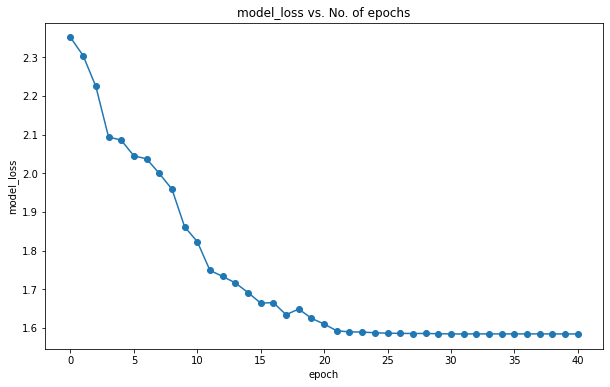

In [ ]:
graph_of_model_losses(model_performance)

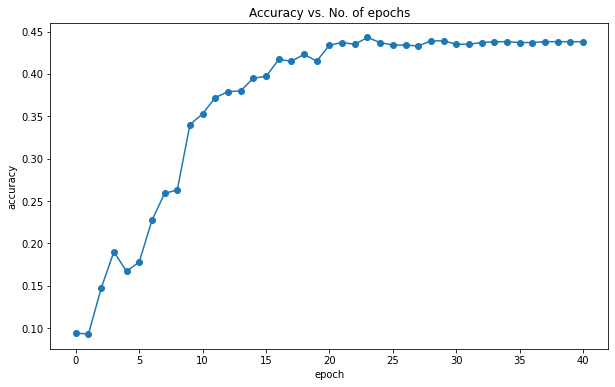

In [ ]:
graph_of_model_accuracies(model_performance)

In [ ]:
model_evaluation(model, data_test_loader)

{'val_model_loss': 1.5586917400360107, 'val_acc': 0.44331249594688416}

**Using Relu Activation Function**

In [ ]:
class GRUNUMModel3(GurmukhiClassification1):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 64)
        self.linear5 = nn.Linear(64, output_size)

    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        return out

In [ ]:
# defining the model to the name 'model'
model = to_device(GRUNUMModel3(), device)

In [ ]:
# finding out the model performance for forward pass
model_performance = [model_evaluation(model, data_val_loader)]
model_performance

[{'val_model_loss': 2.30517578125, 'val_acc': 0.11599999666213989}]

In [ ]:
model_performance += model_insetion(10,0.01, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 2.1143, val_acc: 0.2010
Epoch [1], val_model_loss: 1.9924, val_acc: 0.2750
Epoch [2], val_model_loss: 1.8224, val_acc: 0.3290
Epoch [3], val_model_loss: 1.7458, val_acc: 0.3880
Epoch [4], val_model_loss: 1.6840, val_acc: 0.4090
Epoch [5], val_model_loss: 1.6749, val_acc: 0.4110
Epoch [6], val_model_loss: 1.6490, val_acc: 0.4140
Epoch [7], val_model_loss: 1.5762, val_acc: 0.4370
Epoch [8], val_model_loss: 1.5846, val_acc: 0.4760
Epoch [9], val_model_loss: 1.5266, val_acc: 0.4550


In [ ]:
model_performance += model_insetion(20, 0.001 , model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 1.4346, val_acc: 0.4940
Epoch [1], val_model_loss: 1.4140, val_acc: 0.4960
Epoch [2], val_model_loss: 1.4017, val_acc: 0.5090
Epoch [3], val_model_loss: 1.3888, val_acc: 0.5040
Epoch [4], val_model_loss: 1.4028, val_acc: 0.5000
Epoch [5], val_model_loss: 1.3945, val_acc: 0.5020
Epoch [6], val_model_loss: 1.3842, val_acc: 0.5120
Epoch [7], val_model_loss: 1.3845, val_acc: 0.5020
Epoch [8], val_model_loss: 1.3910, val_acc: 0.5090
Epoch [9], val_model_loss: 1.4332, val_acc: 0.5010


In [ ]:
model_performance += model_insetion(10, 0.00001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 1.3912, val_acc: 0.5170
Epoch [1], val_model_loss: 1.3776, val_acc: 0.5160
Epoch [2], val_model_loss: 1.3747, val_acc: 0.5170
Epoch [3], val_model_loss: 1.3751, val_acc: 0.5140
Epoch [4], val_model_loss: 1.3756, val_acc: 0.5120
Epoch [5], val_model_loss: 1.3753, val_acc: 0.5140
Epoch [6], val_model_loss: 1.3755, val_acc: 0.5150
Epoch [7], val_model_loss: 1.3759, val_acc: 0.5140
Epoch [8], val_model_loss: 1.3757, val_acc: 0.5130
Epoch [9], val_model_loss: 1.3761, val_acc: 0.5140


In [ ]:
model_performance += model_insetion(10, 0.000001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 1.3761, val_acc: 0.5130
Epoch [1], val_model_loss: 1.3761, val_acc: 0.5120
Epoch [2], val_model_loss: 1.3761, val_acc: 0.5110
Epoch [3], val_model_loss: 1.3762, val_acc: 0.5100
Epoch [4], val_model_loss: 1.3762, val_acc: 0.5100
Epoch [5], val_model_loss: 1.3762, val_acc: 0.5100
Epoch [6], val_model_loss: 1.3762, val_acc: 0.5110
Epoch [7], val_model_loss: 1.3763, val_acc: 0.5120
Epoch [8], val_model_loss: 1.3763, val_acc: 0.5110
Epoch [9], val_model_loss: 1.3764, val_acc: 0.5110


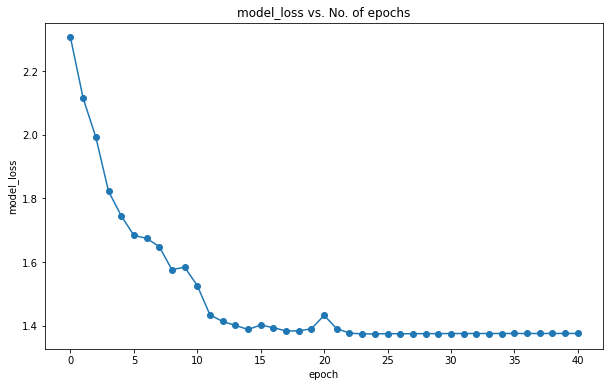

In [ ]:
graph_of_model_losses(model_performance)

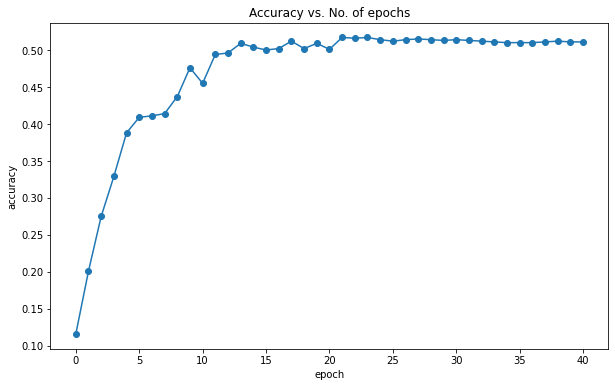

In [ ]:
graph_of_model_accuracies(model_performance)

In [ ]:
model_evaluation(model, data_test_loader)

{'val_model_loss': 1.3286659717559814, 'val_acc': 0.5451874732971191}